**9- . Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE,MDS
from sklearn.manifold import LocallyLinearEmbedding


In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

In [ ]:
random = RandomForestClassifier(n_estimators=100, random_state=42)
random.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = random.predict(X_test)

print(accuracy_score(y_pred,y_test))

0.9705


In [ ]:
pca = PCA (n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [ ]:
random2 = RandomForestClassifier(n_estimators=100, random_state=42)
random2.fit(X_train_reduced,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
 X_test_reduced =pca.transform(X_test)
 y_pred = random2.predict (X_test_reduced)

In [ ]:
print(accuracy_score(y_pred,y_test))

0.9481


less accuracy but much faster  

**10- Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the
result using Matplotlib. You can use a scatterplot using 10 different colors to rep‐
resent each image’s target class. Alternatively, you can write colored digits at the
location of each instance, or even plot scaled-down versions of the digit images
themselves (if you plot all digits, the visualization will be too cluttered, so you
should either draw a random sample or plot an instance only if no other instance
has already been plotted at a close distance). You should get a nice visualization
with well-separated clusters of digits. Try using other dimensionality reduction
algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.**

In [3]:
m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

y =  [int(i)  for i in y ]

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

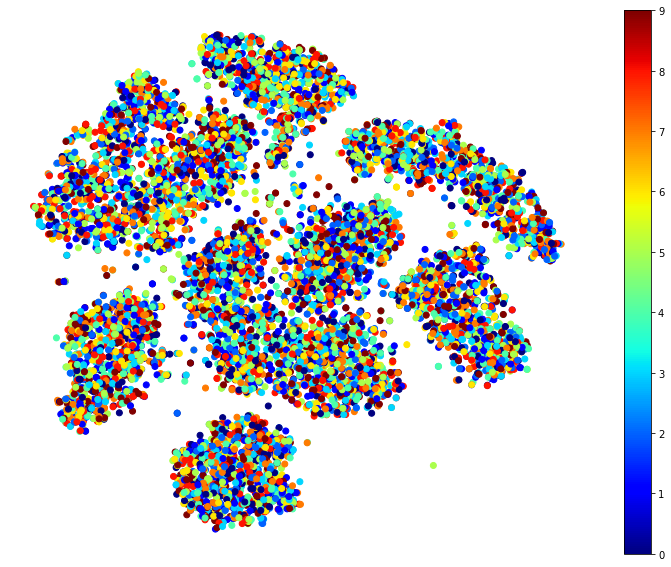

In [ ]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c= y,cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()


In [ ]:
PCA = PCA(n_components=2, random_state=42)
X_reduced = PCA.fit_transform(X)

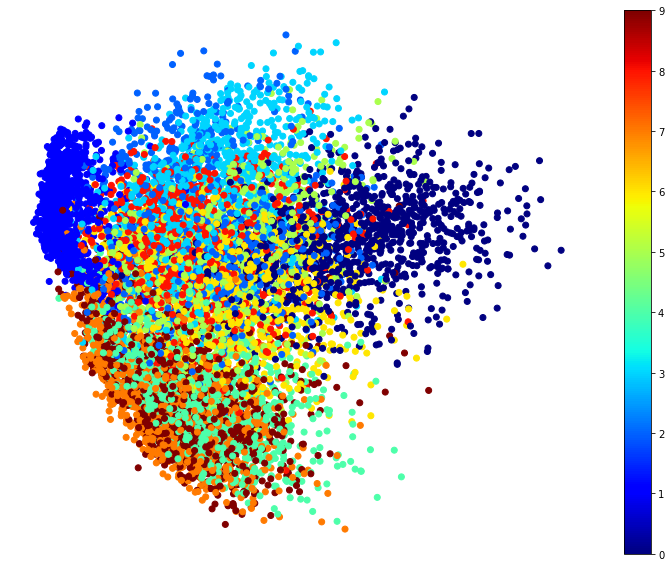

In [ ]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()


In [ ]:
ILL = LocallyLinearEmbedding(n_components=2, random_state=42)
X_reduced = ILL.fit_transform(X)

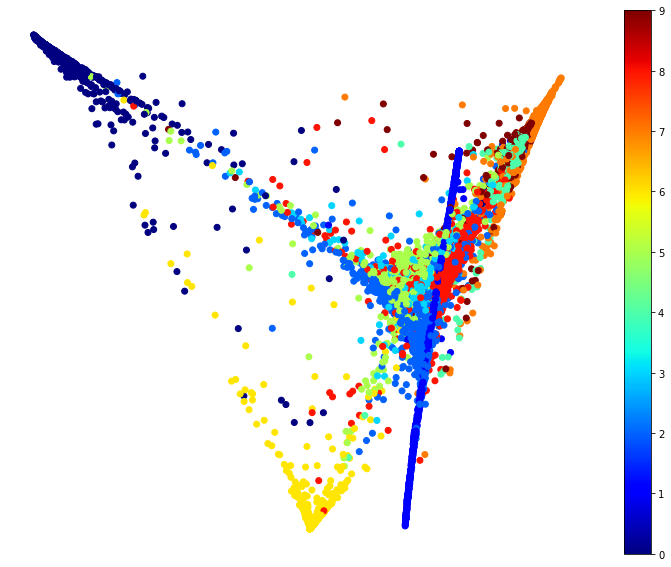

In [ ]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()


In [ ]:
mds =  MDS(n_components=2, random_state=42)
X_reduced = mds.fit_transform(X)

In [ ]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()